Visualise the particles’ movement, simplify the particles’ dimensions to two, x and y.

1. Import libraries

In [2]:
import random
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

2. Define fitness function

We use the function: f(x,y)=(x-2y+3)^2+(2x+y-8)^2. The global minimum of this function is 0. All particles should move from random points towards the optimal position of x and y coordinates, where the value becomes near 0.

In [3]:
# Fitness function
# We assume the problem can be expressed by the following equation:
# f(x1,x2)=(x1+2*-x2+3)^2 + (2*x1+x2-8)^2
# The objective is to find a minimum which is 0

def fitness_function(x1,x2):
  f1=x1+2*-x2+3
  f2=2*x1+x2-8
  z = f1**2+f2**2
  return z

3. Update velocity

We apply the random values for r1,r2 and w. c1 and c2 are given smaller values at 0.1. The inertia value can be scheduled; starting from 0.9 and gradually reducing to 0.4. In our case, we generate the normal distribution with min 0.5 and max 1 and randomly select a value at each generation, following the experiments by

In [4]:
def update_velocity(particle, velocity, pbest, gbest, w_min=0.5, max=1.0, c=0.1):
  # Initialise new velocity array
  num_particle = len(particle)
  new_velocity = np.array([0.0 for i in range(num_particle)])
  # Randomly generate r1, r2 and inertia weight from normal distribution
  r1 = random.uniform(0,max)
  r2 = random.uniform(0,max)
  w = random.uniform(w_min,max)
  c1 = c
  c2 = c
  # Calculate new velocity
  for i in range(num_particle):
    new_velocity[i] = w*velocity[i] + c1*r1*(pbest[i]-particle[i])+c2*r2*(gbest[i]-particle[i])
  return new_velocity

4. Update position

As described in the algorithm, the new position is a sum of the current position and velocity.

In [5]:
def update_position(particle, velocity):
  # Move particles by adding velocity
  new_particle = particle + velocity
  return new_particle

5. PSO's main function

Firstly, we initialise the particles, their best position, velocity and fitness value. We also set the global best position based on the particles’ initial position. Then we loop from one generation to another. The algorithm should stop when it reaches the max number of generations or a success criterion. In our case, it is when the average fitness value surpasses a specific value.

In [27]:
def pso_2d(population, dimension, position_min, position_max, generation, fitness_criterion):
  # Initialisation
  # Population
  particles = [[random.uniform(position_min, position_max) for j in range(dimension)] for i in range(population)]
  # Particle's best position
  pbest_position = particles
  # Fitness
  pbest_fitness = [fitness_function(p[0],p[1]) for p in particles]
  # Index of the best particle
  gbest_index = np.argmin(pbest_fitness)
  # Global best particle position
  gbest_position = pbest_position[gbest_index]
  # Velocity (starting from 0 speed)
  velocity = [[0.0 for j in range(dimension)] for i in range(population)]

  # Loop for the number of generation
  for t in range(generation):
    # Stop if the average fitness value reached a predefined success criterion
    if np.average(pbest_fitness) <= fitness_criterion:
      break
    else:
      for n in range(population):
        # Update the velocity of each particle
        velocity[n] = update_velocity(particles[n], velocity[n], pbest_position[n], gbest_position)
        # Move the particles to new position
        particles[n] = update_position(particles[n], velocity[n])
    # Calculate the fitness value
    pbest_fitness = [fitness_function(p[0],p[1]) for p in particles]
    # Find the index of the best particle
    gbest_index = np.argmin(pbest_fitness)
    # Update the position of the best particle
    gbest_position = pbest_position[gbest_index]

  # Print the results
  print('Global Best Position: ', gbest_position)
  print('Best Fitness Value: ', min(pbest_fitness))
  print('Average Particle Best Fitness Value: ', np.average(pbest_fitness))
  print('Number of Generation: ', t)

6. Set parameter values and run the algorithm

We created 100 particles, of which positions were randomly placed at x and y coordinates, ranging between -100 and 100. As the function takes x and y, the particle’s position is 2-dimensional. The success criterion is 0.001 or lower. The programme should stop before the 400th generation if the criterion is met.

In [28]:
population = 100
dimension = 2
position_min = -100.0
position_max = 100.0
generation = 400
fitness_criterion = 10e-4


By running the algorithm with the above configurations, we obtained the following outcome:

In [29]:
pso_2d(population, dimension, position_min, position_max, generation, fitness_criterion)

Global Best Position:  [2.60003644 2.80006886]
Best Fitness Value:  3.0349853611036995e-08
Average Particle Best Fitness Value:  0.0007899279412708864
Number of Generation:  66


Because of its stochastic nature, the result changes every time you run the programme. It took 68 generations to achieve the success criterion. The best particle reached the positions x≈2.6 and y≈2.8, where the fitness function returns the global minimum.

7. Matplotlib plot and animation

Global Best Position:  [2.60001191 2.79998582]
Best Fitness Value:  1.7157078202423315e-09
Average Particle Best Fitness Value:  0.0009431869461692269
Number of Generation:  68


TypeError: 'NoneType' object is not subscriptable

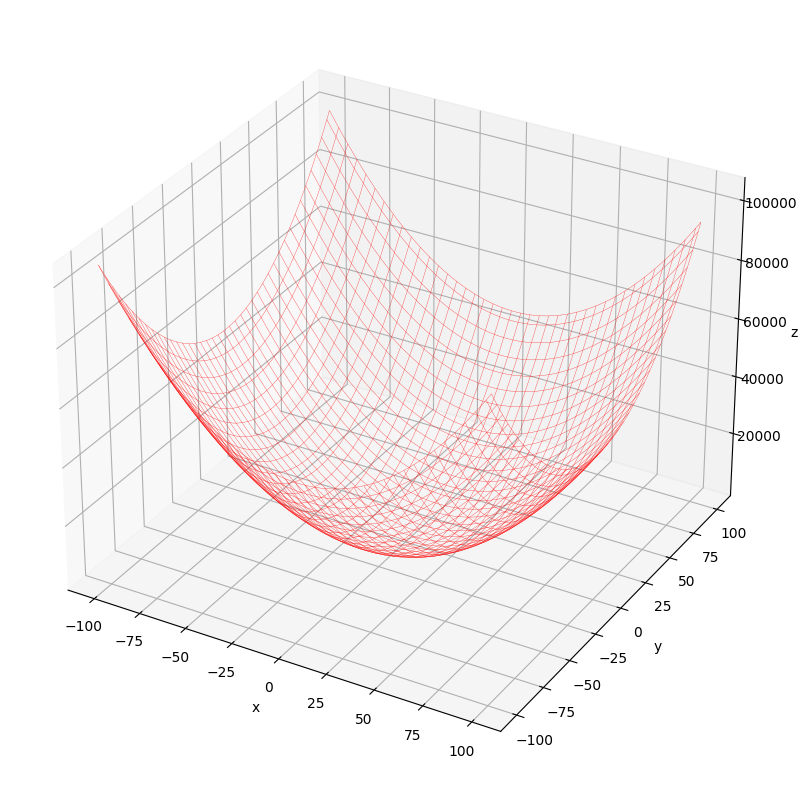

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation

# Assuming pso_2d returns the particles array
particles = pso_2d(population, dimension, position_min, position_max, generation, fitness_criterion)

# Plotting prepartion
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
x = np.linspace(position_min, position_max, 80)
y = np.linspace(position_min, position_max, 80)
X, Y = np.meshgrid(x, y)
Z = fitness_function(X, Y)
ax.plot_wireframe(X, Y, Z, color='r', linewidth=0.2)

# Animation image placeholder
images = []

# Add plot for each generation (within the generation for-loop)
image = ax.scatter3D([
    particles[n][0] for n in range(population)],
    [particles[n][1] for n in range(population)],
    [fitness_function(particles[n][0],particles[n][1]) for n in range(population)], c='b')
images.append([image])

# Generate the animation image and save
animated_image = animation.ArtistAnimation(fig, images)
animated_image.save('./pso_simple.gif', writer='pillow')